In [1]:
#Task 1: Build a Random Forest Classifier
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize base model
rf = RandomForestClassifier(random_state=42)

In [6]:
# Define hyperparameter grid to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 5, None] }

In [7]:
# Use GridSearchCV to search best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, None],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [8]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.95


In [9]:
# Final model with best parameters
best_rf = grid_search.best_estimator_

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Predict cross-validated outputs for all data
y_pred_cv = cross_val_predict(best_rf, X, y, cv=5)


In [12]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y, y_pred_cv, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



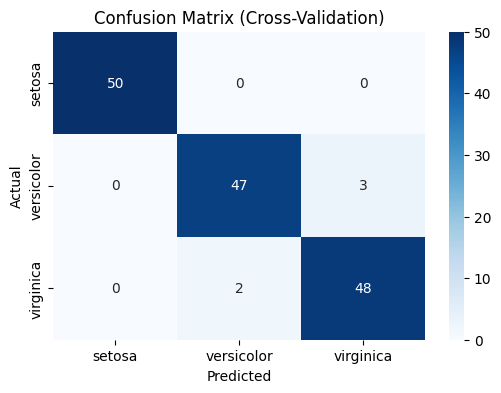

In [13]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Cross-Validation)")
plt.show()

In [14]:
import numpy as np


In [15]:
# Feature Importance Analysis
importances = best_rf.feature_importances_

In [16]:
# Create a DataFrame to display feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
})

In [17]:
# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [18]:
# Print the feature importance values
print("Feature Importance:\n")
print(feature_importance_df)


Feature Importance:

             Feature  Importance
2  petal length (cm)    0.465556
3   petal width (cm)    0.414579
0  sepal length (cm)    0.108548
1   sepal width (cm)    0.011316


C:\Users\shali\AppData\Local\Temp\ipykernel_21748\353885687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


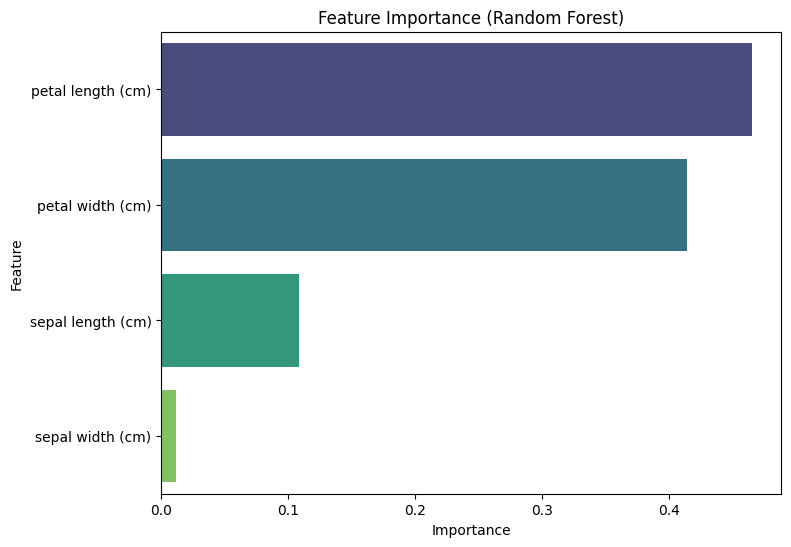

In [19]:
# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()